In [50]:
from typing import TypedDict, Annotated
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import MemorySaver

from langchain_openai import ChatOpenAI

import random


In [51]:
from dotenv import load_dotenv

load_dotenv()


True

In [52]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


In [53]:
@tool
def get_stock_price(symbol: str) -> float:
    """Get the current stock price for a given symbol.

    Args:
        symbol: The stock symbol (e.g., 'AAPL', 'GOOGL')

    Returns:
        float: The current stock price
    """
    return round(random.random() * 100, 2)


tools = [get_stock_price]


In [54]:
llm = init_chat_model("openai:gpt-4.1-nano")
llm_with_tools = llm.bind_tools(tools)
memory = MemorySaver()


In [55]:
def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


builder = StateGraph(State)

builder.add_node("chatbot", chatbot)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "chatbot")
builder.add_conditional_edges("chatbot", tools_condition)
builder.add_edge("tools", "chatbot")
builder.add_edge("chatbot", END)

graph = builder.compile(checkpointer=memory)


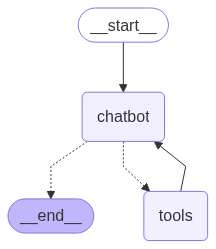

In [56]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


In [57]:
# state = graph.invoke(
#     {"messages": [{"role": "user", "content": "What's the stock price of AAPL?"}]}
# )
# state["messages"]


In [58]:
# state = graph.invoke(
#     {
#         "messages": [
#             {"role": "user", "content": "Just give the sun's radius in kilometers"}
#         ]
#     }
# )
# state["messages"]


In [59]:
config = {"configurable": {"thread_id": 1}}


In [60]:
state = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "I want 10 stock of AAPL and 20 stock of GOOGL. What will be the cost?",
            }
        ]
    },
    config=config,
)
print(state["messages"])
print("*" * 100)
print(state["messages"][-1].content)
print("*" * 100)


[HumanMessage(content='I want 10 stock of AAPL and 20 stock of GOOGL. What will be the cost?', additional_kwargs={}, response_metadata={}, id='ce8c97d8-0dfc-462f-9bdb-1aca1bae433b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oAGMUDS7rG5tZbNsoAtNLBCH', 'function': {'arguments': '{"symbol": "AAPL"}', 'name': 'get_stock_price'}, 'type': 'function'}, {'id': 'call_q2kME6UcVMxU0sjszRnZi50t', 'function': {'arguments': '{"symbol": "GOOGL"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 101, 'total_tokens': 150, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_c4c155951e', 'id': 'chatcmpl-C8BFQdKqGj2OLCNwI2BGKDChmmYiq', 'service_tier': 'default', 'fi

In [61]:
state = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "I also want to buy 10 of RIL. Add it to the previous total.",
            }
        ]
    },
    config=config,
)

print(state["messages"])
print("*" * 100)
print(state["messages"][-1].content)
print("*" * 100)


[HumanMessage(content='I want 10 stock of AAPL and 20 stock of GOOGL. What will be the cost?', additional_kwargs={}, response_metadata={}, id='ce8c97d8-0dfc-462f-9bdb-1aca1bae433b'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oAGMUDS7rG5tZbNsoAtNLBCH', 'function': {'arguments': '{"symbol": "AAPL"}', 'name': 'get_stock_price'}, 'type': 'function'}, {'id': 'call_q2kME6UcVMxU0sjszRnZi50t', 'function': {'arguments': '{"symbol": "GOOGL"}', 'name': 'get_stock_price'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 101, 'total_tokens': 150, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_c4c155951e', 'id': 'chatcmpl-C8BFQdKqGj2OLCNwI2BGKDChmmYiq', 'service_tier': 'default', 'fi